# Exercise 01 Notebook -  Image Classification with a Neural Network

In this exercise you will implement a neural network from scratch using pytorch. We train the model on the fashion MNIST dataset. The Goal is to find a good architecture and hyperparameters to achieve the highest test score possible!

We'll use the Fashion-MNIST data set during this exercise. The Fashion-MNIST dataset consists of 60,000 training examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 different classes:

    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"

![Fashion MNIST Long](https://raw.githubusercontent.com/jmelsbach/ai-im/main/img/fashion-mnist_long.png)

In [ ]:
# Imports
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Library for printing out progress bars
# This can be useful in the training loop
# The use is optional
from tqdm.notebook import tqdm

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## 1. Download the dataset and create a dataset for training, validation and test data.
You can learn how to download the training dataset [here](https://pytorch.org/vision/stable/datasets.html#fashion-mnist). Use the documentation to download the training and test set of the Fashion-MNIST Dataset. Out of the box the images of the dataset have the PIL format but we need them as `torch.Tensors` to feed them in our neural network later on. <br>
**Hint**: Use a transform to convert the PIL to the Tensor format. You can learn about transformations [here](https://pytorch.org/vision/stable/transforms.html).

In [ ]:
toTensor = transforms.ToTensor()

In [ ]:
train_data = torchvision.datasets.FashionMNIST('sample_data',train=True, transform = toTensor, download = True)
train_data

100%|██████████| 26421880/26421880 [00:02<00:00, 12656771.12it/s]


Extracting sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207869.97it/s]


Extracting sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3854913.78it/s]


Extracting sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6464753.59it/s]

Extracting sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: sample_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data = torchvision.datasets.FashionMNIST("sample_data", train=False, transform = toTensor)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: sample_data
    Split: Test
    StandardTransform
Transform: ToTensor()

## 2. Explore and understand the dataset.
If you successfully created the dataset objects, try to explore the data.
Answer the following questions:
* How many training examples do we have?
* How many test examples do we have?
* What type of datastructure is each datapoint?
* Get the shape of the a training image. What does each dimensions mean?
    * You notice that the shape is a little bit awkward. We'll deal with this later in the `foward()` method of our neural network
* Do we need to normalize the data?
* Plot a random image and the corresponding label from the dataset with the help of the `matplotlib`library.

In [ ]:
# How many training examples do we have?
len(train_data)

60000

In [ ]:
# How many test examples do we have?
len(test_data)

10000

In [ ]:
# What type of datastructure is each datapoint?

print("Each datapoint contains a "+ str(type(train_data[0])) + ".")
print("The picture as a  "+ str(type(train_data[0][0])) + ".")
print("And the label as a "+ str(type(train_data[0][0])) + ".")

Each datapoint contains a <class 'tuple'>.
The picture as a  <class 'torch.Tensor'>.
And the label as a <class 'torch.Tensor'>.


In [ ]:
# Get the shape of the a training image. What does each dimensions mean?
#   You notice that the shape is a little bit awkward. We'll deal with this later in the foward() method of our neural network

print("We have 28x28 pixels and the color channel being in the first position: " + str(train_data[0][0].shape))

We have 28x28 pixels and the color channel being in the first position: torch.Size([1, 28, 28])


In [ ]:
# Do we need to normalize the data?


train_dl = DataLoader(train_data)
max = 0
min = 1
for x, _ in train_dl:
  max = torch.max(x) if torch.max(x) > max else max
  min = torch.min(x) if torch.min(x) < min else min

print("As all values are between 0 and 1 we do not have to normalize the data.")
print(f"Min value: {min} \nMax value {max}")


As all values are between 0 and 1 we do not have to normalize the data.
Min value: 0.0 
Max value 1.0


In [ ]:
# Plot a random image and the corresponding label from the dataset with the help of the matplotliblibrary.
def show_image(k):
  x = k[0]
  x = x.reshape(28,28)
  plt.imshow(x, cmap='gray')
  plt.title("Label: " + str(k[1]) + " (" + dic[k[1]] + ")")
import numpy

In [ ]:
dic = {0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

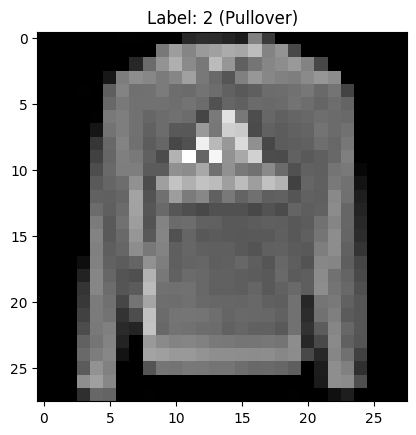

In [ ]:
random_index = int(numpy.random.random()*len(train_data))
show_image(train_data[random_index])

## 3. Create DataLoader for training, validation and test set.

We do not have a validation set, yet. Split the `train_data` with the help of the `random_split`. Look at the documentation of the random_split function [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split). Split the data in a 80:20 train/val ratio.




In [ ]:
trainSize = int(0.8*len(train_data))
valSize = len(train_data) - trainSize
train, val = torch.utils.data.random_split(train_data, [trainSize, valSize], torch.Generator().manual_seed(42))

* Create a `torch.utils.data.DataLoader` for train, val and test data.
* Use a batch size of 32.
* Don't forget to shuffle the data!

If you don't know why we need a train, val, and a test set. Read [this article](https://machinelearningmastery.com/difference-test-validation-datasets/)

In [ ]:
train_dl = DataLoader(train, batch_size=32, shuffle=True)
val_dl   = DataLoader(val, batch_size=32, shuffle=True)
test_dl  = DataLoader(test_data, batch_size=32, shuffle=True)

## 4. Create a Neural Network Architecture that fits the problem.

Create a Neural Network with at least to hidden layers. Choose the correct input and output size suitable for the problem.

In [ ]:
import torch.nn.functional as F

In [ ]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 512)
        self.l2 = nn.Linear(512, 256)
        self.l3 = nn.Linear(256, 128)
        self.l4 = nn.Linear(128, 10)
        # dropout for regularization and preventing the co-adaptation of neurons
        self.dropout = nn.Dropout(0.2)

    def forward(self, X):
      # This flattens the tensor array
      X = X.squeeze(1)
      X = X.reshape(X.size(0), -1)
      X = self.dropout(F.relu(self.l1(X)))
      X = self.dropout(F.relu(self.l2(X)))
      X = self.dropout(F.relu(self.l3(X)))
      X = F.softmax(self.l4(X), dim = 1)
      return X

Instantiate the `NeuralNetwork`

In [ ]:
model = NeuralNetwork()
# execute on gpu if available
model.to(device)

NeuralNetwork(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=128, bias=True)
  (l4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

## 5. Set the hyperparameters and choose a suitable loss function.

Instantiate an optimizer and a loss function. Try different optimizers and pick a suitable loss function for the data. You can look up how to create an optimizer [here](https://pytorch.org/docs/stable/optim.html).

In [ ]:
epochs = 40
lr = 0.025
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

## 6. Create a training loop

The trainig loop should receive the `net`, `train_dl`, `val_dl`, `epochs`, `optimizer`, and `loss_func`.
Print out the average loss and the accuarcy on both the train **and** validation data.

In [ ]:
def train(net, train_dl, val_dl , epochs, optimizer, loss_func):
      # start train mode
      net.train()
      # define arrays for evaluation
      train_losses, valid_losses = [], []
      train_accs, valid_accs = [], []

      # loop over all epochs
      for epoch in tqdm(range(epochs)):
        # reset evaluation variables
        train_loss, valid_loss = 0, 0
        train_acc, valid_acc = 0, 0

        # training loop
        for x,y in train_dl:
          # train on gpu
          x, y = x.to(device), y.to(device)
          # reset optimizer
          optimizer.zero_grad()
          # predict
          y_hat = net(x)
          # calculate loss and adjust weights
          loss = loss_func(y_hat, y)
          loss.backward()
          optimizer.step()
          # calculate evaluation kpis
          train_loss += loss*x.size(0)
          _, pred = torch.max(y_hat, 1)
          train_acc += torch.sum(torch.eq(pred, y)).item()

        # valiadation loop
        for x,y in val_dl:
          # train on gpu
          x, y = x.to(device), y.to(device)
          # predict on trained model
          y_hat = net(x)
          # calculate evaluation kpis
          loss = loss_func(y_hat, y)
          valid_loss += loss*x.size(0)
          _, pred = torch.max(y_hat, 1)
          valid_acc += torch.sum(torch.eq(pred, y)).item()

        # calculations for evaluations
        train_loss = train_loss/ len(train_dl.sampler)
        train_acc = train_acc/ len(train_dl.sampler)
        valid_loss = valid_loss/ len(val_dl.sampler)
        valid_acc = valid_acc/ len(val_dl.sampler)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss:.6f} \tTraining Acc: {train_acc:.6f} \tValidation Loss: {valid_loss:.6f} \tValidation Acc: {valid_acc:.6f}')

      # return losses for plotting
      return train_losses, valid_losses


## 7. Train the model

In [ ]:
# To get a better idea of how well your model performs
# you should implement an accuracy function that to check how well your model performs
# After each epoch you should check the model performance on the validation data

In [ ]:
train_dl = DataLoader(train_data, batch_size=32, shuffle=True)

In [ ]:
# Execute the train function and train the model.
train_losses, valid_losses = train(model, train_dl, val_dl, epochs, optimizer, loss_func)

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 2.292021 	Training Acc: 0.161833 	Validation Loss: 2.241569 	Validation Acc: 0.200000
Epoch: 2 	Training Loss: 2.065026 	Training Acc: 0.411687 	Validation Loss: 1.888104 	Validation Acc: 0.603417
Epoch: 3 	Training Loss: 1.828243 	Training Acc: 0.646604 	Validation Loss: 1.788376 	Validation Acc: 0.692167
Epoch: 4 	Training Loss: 1.753624 	Training Acc: 0.727625 	Validation Loss: 1.730217 	Validation Acc: 0.747083
Epoch: 5 	Training Loss: 1.713260 	Training Acc: 0.758958 	Validation Loss: 1.713309 	Validation Acc: 0.756417
Epoch: 6 	Training Loss: 1.692963 	Training Acc: 0.775271 	Validation Loss: 1.691086 	Validation Acc: 0.775250
Epoch: 7 	Training Loss: 1.683070 	Training Acc: 0.784000 	Validation Loss: 1.681527 	Validation Acc: 0.784500
Epoch: 8 	Training Loss: 1.674648 	Training Acc: 0.791562 	Validation Loss: 1.677731 	Validation Acc: 0.787500
Epoch: 9 	Training Loss: 1.670299 	Training Acc: 0.795646 	Validation Loss: 1.672957 	Validation Acc: 0.791417
E

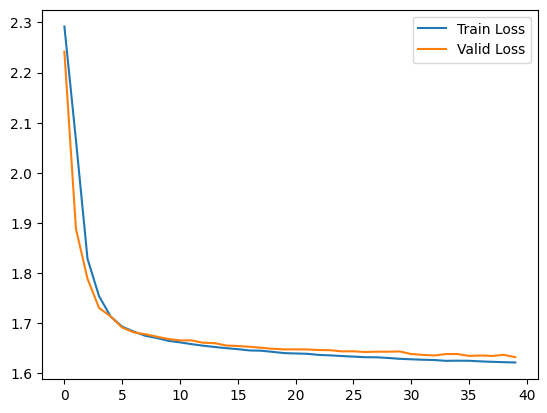

In [ ]:
func = lambda x : x.cpu().item()

plt.plot(list(map(func, train_losses)), label='Train Loss')
plt.plot(list(map(func, valid_losses)), label='Valid Loss')
plt.legend()

If your training loop is working and your model is learning, try different architectures (e.g, more/less layers, more/less neurons, different optimizer, different learning rates) and evaluate it on the validation set.


At the very end take the model with the best performance on the validation data and evaluate it on the test set.

In [ ]:
# Evaluate on Test set.
# Do this only once at the very end. Don't cheat!

In [ ]:
model_new = NeuralNetwork()
# execute on gpu if available
model_new.to(device)

NeuralNetwork(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=128, bias=True)
  (l4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
epochs = 9
lr = 0.025
optimizer = torch.optim.SGD(model_new.parameters(), lr=lr)
loss_func = nn.CrossEntropyLoss()

In [ ]:
train_losses, valid_losses = train(model_new, train_dl, val_dl, epochs, optimizer, loss_func)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 1.665556 	Training Acc: 0.798933 	Validation Loss: 1.670547 	Validation Acc: 0.792917
Epoch: 2 	Training Loss: 1.660850 	Training Acc: 0.803400 	Validation Loss: 1.662859 	Validation Acc: 0.801333
Epoch: 3 	Training Loss: 1.657268 	Training Acc: 0.806700 	Validation Loss: 1.656729 	Validation Acc: 0.806583
Epoch: 4 	Training Loss: 1.654127 	Training Acc: 0.809967 	Validation Loss: 1.656366 	Validation Acc: 0.806750
Epoch: 5 	Training Loss: 1.651258 	Training Acc: 0.812517 	Validation Loss: 1.649568 	Validation Acc: 0.813250
Epoch: 6 	Training Loss: 1.648431 	Training Acc: 0.814933 	Validation Loss: 1.649323 	Validation Acc: 0.813917
Epoch: 7 	Training Loss: 1.646998 	Training Acc: 0.816550 	Validation Loss: 1.650055 	Validation Acc: 0.814250
Epoch: 8 	Training Loss: 1.644244 	Training Acc: 0.819333 	Validation Loss: 1.647209 	Validation Acc: 0.816833
Epoch: 9 	Training Loss: 1.642205 	Training Acc: 0.820900 	Validation Loss: 1.642275 	Validation Acc: 0.821583


In [ ]:
import numpy as np

model_new.eval()

test_loss = 0
test_acc = 0

for x,y in test_dl:
  x, y = x.to(device), y.to(device)
  y_hat = model_new(x)
  loss = loss_func(y_hat, y)
  test_loss += loss*x.size(0)

  _, pred = torch.max(y_hat, 1)
  test_acc += torch.sum(torch.eq(pred, y)).item()

test_loss = test_loss/ len(test_dl.sampler)
test_acc = test_acc/ len(test_dl.sampler)

print(f"Test Loss: {test_loss:.6f} \tTest Acc: {test_acc:.6f}")